## t-distributed Stochastic Neighbor Embedding (t-SNE)

https://distill.pub/2016/misread-tsne/

Jáá sabemos que é necessário reduzir a dimensionalidade da entrada para evitar o problema da **maldição de entrada**. 

O t-SNE, não apenas reduz a dimensão do conjunto de dados para facilitar a análise e a visualizaçãão, mas também preserva a "geometria" do conjunto de dados. 

A classe de algoritmos de redução de dimensionalidade que exploram a geometria dos dados e a utilizam para criar uma função de mapeamento $\Phi()$ é conhecida como **manifold learning**.


---

Sklearn documentation:

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. **with different initializations we can get different results**.

**It is highly recommended to use another dimensionality reduction method** (e.g. PCA for dense data or TruncatedSVD for sparse data) **to reduce the number of dimensions to a reasonable amount** (e.g. 50) **if the number of features is very high**. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
#palette = sns.color_palette("bright", 10)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
X, y = load_digits(return_X_y=True)
print(X.shape)
y

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

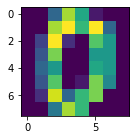

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(X[0,:].reshape(8,8))
plt.show()

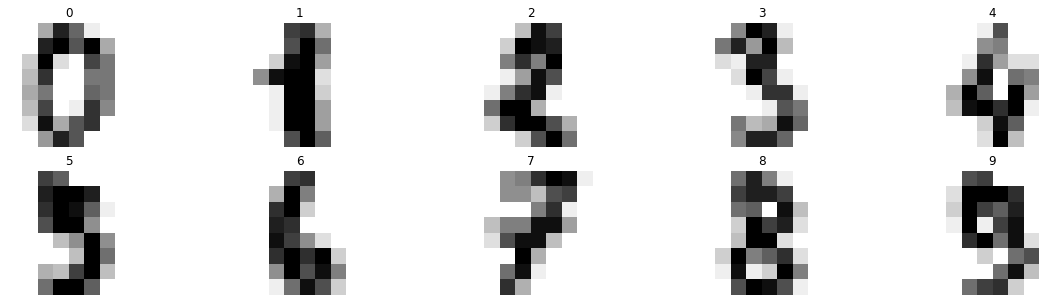

In [4]:
plt.figure(figsize=(20,5))

for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_axis_off()
    indx = np.where(y == i)[0][0]
    img = X[indx, :].reshape(8,8)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(str(i))
plt.show()

In [5]:
n_components = 2
perplexity = 30

tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(16,9))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1152x648 with 0 Axes>

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# pca = PCA(n_components=n_components)
# X_embedded_pca = pca.fit_transform(X)

# lda = LinearDiscriminantAnalysis(n_components=n_components)
# X_embedded_lda = lda.fit(X, y).transform(X)

# plt.figure(figsize=(20,9))
# plt.subplot(1,2,1)
# sns.scatterplot(X_embedded_pca[:,0], X_embedded_pca[:,1], hue=y, legend='full', palette=palette)
# plt.subplot(1,2,2)
# sns.scatterplot(X_embedded_lda[:,0], X_embedded_lda[:,1], hue=y, legend='full', palette=palette)
# plt.show()